# Introduction

- This project is based on the case study of a telecommunication company, which is facing a customer churn issue.
- The project aims at understanding the pattern of the data and predicting customers who are going to churn based on multiple variables to help the company in retaining their existing customers.
- The project was accomplished by building a machine learning workflow that will run autonomously with the CSV file and return the best-performing model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
### 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [ ]:
import pandas as pd
d1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/TelcomCustomer-Churn_1.csv")
d2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/TelcomCustomer-Churn_2.csv")

In [ ]:
print("shape : dataset 1 : ",d1.shape)
print("\nshape : dataset 1 : ",d2.shape)
print("\n",d1.head(2))
print("\n",d2.head(2))

shape : dataset 1 :  (7043, 10)

shape : dataset 1 :  (7043, 12)

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  

    customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0              No  Month-to-month              Yes  Electronic check   
1              No        One year               No      Mailed check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95     

### 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [ ]:
d = d1.merge(d2, on='customerID',how="inner")
print(d.shape)

(7043, 21)


### 1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python

In [ ]:
if (d.shape[0] == d1.shape[0] & d1.shape[0] == d2.shape[0]):
  print("The resultant dataset has equal number of columns ({}).".format(d.shape[0]))
if (d.shape[1] == (d1.shape[1] + d2.shape[1] - 1)):
  print("The number of columns ({}) in The resultant dataset is correct.".format(d.shape[1]))

The resultant dataset has equal number of columns (7043).
The number of columns (21) in The resultant dataset is correct.


### 2 a Impute missing/unexpected values in the DataFrame

In [ ]:
d.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check unique values in each categorical feature

for i in d.dtypes[d.dtypes == 'object'].index:
  if(not ((d[i].name == 'customerID') | (d[i].name == 'TotalCharges'))):
    print(d[i].value_counts(),"\n")

# To convert an index to a list in Pandas DataFrame, use the Index. tolist() , Index. values. tolist() and list() functions.

Male      3555
Female    3488
Name: gender, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     2810
Yes                    2707
No internet service    15

In [ ]:
# To find non-numeric strings in  TotalCharges column

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False


l=[]
for i in d.TotalCharges:
  if not is_float(i):
    l.append(i)

print("Number of non-numeric values : ",len(l))
print("Unique non-numeric values : ", set(l))
d[d.TotalCharges == " "].shape

Number of non-numeric values :  11
Unique non-numeric values :  {' '}


(11, 21)

**IMP:**
- TotalCharges column contains some blank entries.
- Need to replace it with appropriate value

In [ ]:
d[d.TotalCharges == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Replace all missing values with zero

d.TotalCharges.replace(" ","0",inplace=True)

In [ ]:
# Change the datatype to float

d.TotalCharges = d.TotalCharges.astype(float)

In [ ]:
# Find the correlation between MonthlyCharges & TotalCharges

d[['MonthlyCharges','TotalCharges']].corr(numeric_only = True)


,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651174
TotalCharges,0.651174,1.000000


In [ ]:
d[d.Contract == "One year"][['MonthlyCharges','TotalCharges']].corr(numeric_only = True)

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.857616
TotalCharges,0.857616,1.000000


In [ ]:
d[d.Contract == "One year"][['Contract','MonthlyCharges','TotalCharges']].head(30)

,Contract,MonthlyCharges,TotalCharges
1,One year,56.95,1889.50
3,One year,42.30,1840.75
9,One year,56.15,3487.95
12,One year,100.35,5681.10
16,One year,20.65,1022.95
21,One year,19.80,202.25
32,One year,66.15,1874.45
40,One year,49.55,475.70
42,One year,20.75,418.25
54,One year,74.85,4456.35


In [ ]:
d[d.TotalCharges == 0][['Contract','MonthlyCharges','TotalCharges']]

,Contract,MonthlyCharges,TotalCharges
488,Two year,52.55,0.0
753,Two year,20.25,0.0
936,Two year,80.85,0.0
1082,Two year,25.75,0.0
1340,Two year,56.05,0.0
3331,Two year,19.85,0.0
3826,Two year,25.35,0.0
4380,Two year,20.00,0.0
5218,One year,19.70,0.0
6670,Two year,73.35,0.0


In [ ]:
d[d.Contract == "Two year"][['Contract','MonthlyCharges','TotalCharges']]

,Contract,MonthlyCharges,TotalCharges
11,Two year,18.95,326.80
15,Two year,113.25,7895.15
17,Two year,106.70,7382.25
23,Two year,59.90,3505.10
28,Two year,90.25,6369.45
...,...,...,...
7017,Two year,20.65,1020.75
7019,Two year,20.15,826.00
7028,Two year,64.10,4326.25
7037,Two year,21.15,1419.40


In [ ]:
d[(d.MonthlyCharges < 21.0) & (d.MonthlyCharges > 18.0)][['Contract','MonthlyCharges','TotalCharges']]

,Contract,MonthlyCharges,TotalCharges
11,Two year,18.95,326.80
16,One year,20.65,1022.95
21,One year,19.80,202.25
22,Month-to-month,20.15,20.15
33,Month-to-month,20.20,20.20
...,...,...,...
7005,One year,19.30,486.20
7017,Two year,20.65,1020.75
7019,Two year,20.15,826.00
7020,Month-to-month,19.20,239.00


In [ ]:
d[(d.MonthlyCharges < 21.0) & (d.MonthlyCharges > 18.0)][['TotalCharges']].mean(numeric_only = True)

TotalCharges    514.17019
dtype: float64

In [ ]:
d[(d.MonthlyCharges < 21.0) & (d.MonthlyCharges > 18.0)][['TotalCharges']].median(numeric_only = True)

TotalCharges    390.4
dtype: float64

In [ ]:
# Get all the records for which the TotalCharges are zero

d_temp = d[d.TotalCharges == 0]
d_temp.shape

(11, 21)

In [ ]:
# Replace all zero values with mean value of the related records

for index,row in d_temp.iterrows():
  chg = row['MonthlyCharges']
  d.at[index, 'TotalCharges'] = round(d[(d.MonthlyCharges < (chg + 1)) & (d.MonthlyCharges > (chg - 1))][['TotalCharges']].mean(numeric_only = True),2)

d[d.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### 2 b Make sure all the variables with continuous values are of ‘Float’ type

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Note:**
- Both charges fields are of type float.

### 2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the pie-chart.

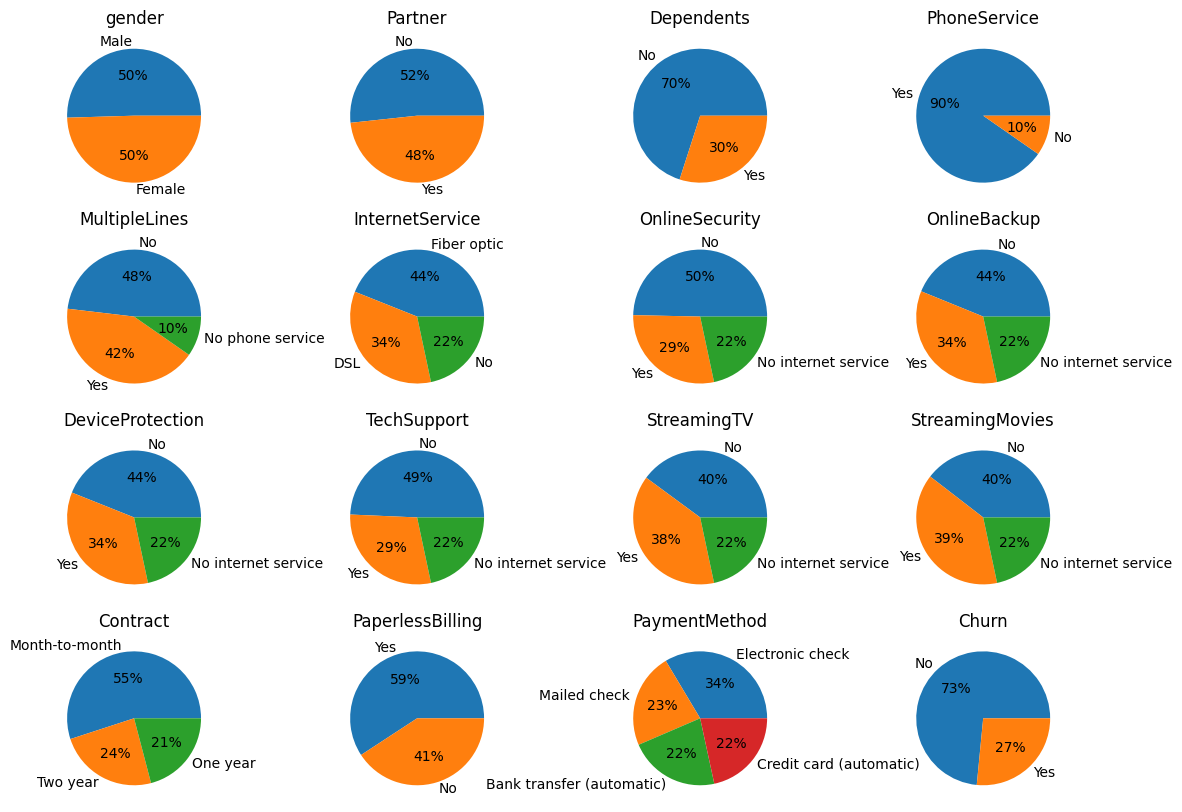

In [ ]:
# This function draws a Pie chart for all the specified columns from the dataframe
def DrawPieCharts(df,cols):
  plt.figure(figsize=(14, 10))
  col_index = object_cols.index
  for i,c in enumerate(col_index):
    data = df[c].value_counts()
    plt.subplot(4,4,i+1)
    plt.pie(data.values,labels = data.index, autopct='%.0f%%')
    plt.title(c)
  plt.show()

# Make a list of columns of type Category
object_cols =d.dtypes[d.dtypes == 'object']
object_cols.drop(labels = 'customerID',inplace = True)

DrawPieCharts(d,object_cols)

### 2 d.Share insights for Q2.c

- There are equal number of male and female customers.
- Very few customers do not have Phone service (**10%**)
- Many customers who have Internet Service, are inclined to use other services as Online Security (**50%**), Online Backup(**44%**), Device Protection(**44%**).
- Fiber Optic connections (**44%**) are more popular than DSL (**34%**) for Internet service.
- Most customers prefer monthly contract (**55%**)
- Most customers prefer digital payment options (**59%**)
- The Churn rate is **27%**. There is a scope to improve the rate. So data analysis is important.

### 2 e.Encode all the appropriate Categorical features with the best suitable approach

- Convert categorical columns to Category type.
- Replace categoties with numeric values

In [ ]:
for feature in d.columns:
    if (d[feature].dtype == 'object') & (feature != "customerID"):
        d[feature] = pd.Categorical(d[feature])

d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
replaceStruct = {
                "gender":     {"Male": 0, "Female": 1},
                "Partner": {"No": 0, "Yes":1 },
                 "Dependents": {"No": 0, "Yes":1 },
                 "PhoneService": {"No": 0, "Yes":1 },
                 "MultipleLines": {"No": 0, "Yes":1, "No phone service":2 },
                 "InternetService": {"No": 0, "Fiber optic":1, "DSL":2 },
                 "OnlineSecurity": {"No": 0, "Yes":1, "No internet service":2 },
                 "OnlineBackup": {"No": 0, "Yes":1, "No internet service":2 },
                 "DeviceProtection": {"No": 0, "Yes":1, "No internet service":2 },
                 "TechSupport": {"No": 0, "Yes":1, "No internet service":2 },
                 "StreamingTV": {"No": 0, "Yes":1, "No internet service":2 },
                 "StreamingMovies": {"No": 0, "Yes":1, "No internet service":2 },
                 "Contract": {"Month-to-month": 0, "One year":1, "Two year":2 },
                 "PaperlessBilling": {"No": 0, "Yes":1 },
                 "PaymentMethod": {"Electronic check": 0, "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3 },
                 "Churn": {"No": 0, "Yes": 1}
                 }
len(replaceStruct)

16

In [ ]:
d=d.replace(replaceStruct)
d.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,2,42.30,1840.75,0


### 2 f.Split the data into 80% train and 20% test.

In [ ]:
X = d.drop(["customerID","Churn"], axis=1)
y = d['Churn']

### 2 g.Normalize/Standardize the data with the best suitable approach

In [ ]:
# from scipy.stats import zscore

# for feature in X.columns:
#     if (X[feature].dtype == 'category'):
#         X[feature] = X[feature].astype("int")

# X  = X.apply(zscore)

**Important Observations:**
- Scaling does not change the scrores.

**Note:**
- A decision tree only splits a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. Other features do not influence this split on a feature.
- So, the remaining features have virtually no effect on the split. This is what makes them invariant to the scale of the features!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

### 3.a Train a model using Decision tree and check the performance of the model on train and test data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix

# defining empty lists to add train and test results
model_name = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []

def PrintScoreMetrics(model, ShowConfusionMatrix = False, AddToScoreList = True, ModelName=None):
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)

  #Predicting on train and tests
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_recall = metrics.recall_score(y_train,pred_train)
  test_recall = metrics.recall_score(y_test,pred_test)

  print("Training accuracy : ", train_acc)
  print("Test accuracy : ", test_acc, "\n")
  print("Training recall : " , train_recall)
  print("Training recall : " , test_recall,"\n")

  if (ShowConfusionMatrix):
    cm = confusion_matrix(y_test, pred_test, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
    plt.figure(figsize = (2,1))
    sns.heatmap(df_cm, annot=True ,fmt='g')

  if (AddToScoreList):
    model_name.append(ModelName)
    acc_train.append(np.round(train_acc,2))
    acc_test.append(np.round(test_acc,2))
    recall_train.append(np.round(train_recall,2))
    recall_test.append(np.round(test_recall,2))

Training accuracy :  0.9980475683351083
Test accuracy :  0.7331440738112136 

Training recall :  0.9934253780407627
Training recall :  0.5373563218390804 



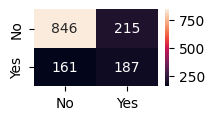

In [ ]:
PrintScoreMetrics(dTree, ShowConfusionMatrix = True,ModelName="DecisionTree")

### 3.b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

Training accuracy :  0.7362442314518992
Test accuracy :  0.7480482611781405 

Training recall :  0.7501643655489809
Training recall :  0.8045977011494253 

Best max_depth: 3
Best class_weight: {0: 0.3, 1: 0.7}


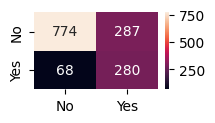

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
max_depth = [None,3,5,7]
min_impurity_decrease = [0.0,]
ccp_alpha = [0.0,]
class_weight = [ {0: 0.3, 1: 0.7}, None]

#Convert to dictionary
# hyperparameters = dict(max_depth= max_depth, min_impurity_decrease= min_impurity_decrease, ccp_alpha= ccp_alpha, class_weight= class_weight )
hyperparameters = dict(max_depth= max_depth, class_weight= class_weight )

#Create new KNN object
dTree_2 = DecisionTreeClassifier()

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Use GridSearch
gs = GridSearchCV(dTree_2, hyperparameters, scoring=acc_scorer, cv=7)
gs.fit(X_train,y_train)

# Set the clf to the best combination of parameters
best_model = gs.best_estimator_

best_model.fit(X_train, y_train)
PrintScoreMetrics(best_model, ShowConfusionMatrix = True,ModelName="DecisionTree with GridSearch")

print('Best max_depth:', gs.best_estimator_.get_params()['max_depth'])
print('Best class_weight:', gs.best_estimator_.get_params()['class_weight'])


**If recall_score is the performance measurement factor**
- We get 80% recall score on test data

Let's try with another performance measurement factor i.e. **Accuracy**

Training accuracy :  0.8022719204827831
Test accuracy :  0.7991483321504613 

Training recall :  0.48652202498356345
Training recall :  0.49137931034482757 

Best max_depth: 5
Best class_weight: None


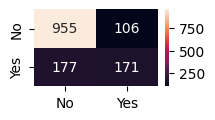

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
max_depth = [None,3,5,7]
min_impurity_decrease = [0.0,]
ccp_alpha = [0.0,]
class_weight = [ {0: 0.3, 1: 0.7}, None]

#Convert to dictionary
# hyperparameters = dict(max_depth= max_depth, min_impurity_decrease= min_impurity_decrease, ccp_alpha= ccp_alpha, class_weight= class_weight )
hyperparameters = dict(max_depth= max_depth, class_weight= class_weight )

#Create new KNN object
dTree_2 = DecisionTreeClassifier()

#Use GridSearch
gs = GridSearchCV(dTree_2, hyperparameters, cv=7)
gs.fit(X_train,y_train)

# Set the clf to the best combination of parameters
best_model = gs.best_estimator_

best_model.fit(X_train, y_train)
PrintScoreMetrics(best_model, ShowConfusionMatrix = True,AddToScoreList=False)

print('Best max_depth:', gs.best_estimator_.get_params()['max_depth'])
print('Best class_weight:', gs.best_estimator_.get_params()['class_weight'])


- Here we get good accuracy on Test data, almost **80%**
- But recall score has dropped to **50%**

Let's try using the best parameters from both the results.

Training accuracy :  0.7715654952076677
Test accuracy :  0.7693399574166075 

Training recall :  0.7468770545693623
Training recall :  0.7701149425287356 



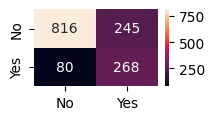

In [ ]:
dTree = DecisionTreeClassifier(max_depth= 5, class_weight = {0: 0.3, 1: 0.7})   #,criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
PrintScoreMetrics(dTree, ShowConfusionMatrix = True,AddToScoreList=False)

- The model is **not overfitted**
- Max accuracy is **77%**
- Good recall score as **77%**
- So, so far the best parameters are **max_depth= 5 and class_weight = {0: 0.3, 1: 0.7}**

### C. Train a model using Random forest and check the performance of the model on train and test data

Training accuracy :  0.7421015264465743
Test accuracy :  0.7544357700496807 

Training recall :  0.7823800131492439
Training recall :  0.8333333333333334 



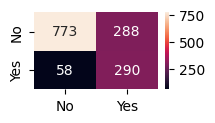

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1, max_depth= 3, class_weight={0:0.3, 1:0.7})
rfcl = rfcl.fit(X_train, y_train)
PrintScoreMetrics(rfcl, ShowConfusionMatrix = True,ModelName="RandomForest")

### D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

Training accuracy :  0.7357117500887469
Test accuracy :  0.7473385379701917 

Training recall :  0.7876397107166337
Training recall :  0.8390804597701149 

Best max_depth: 3
Best class_weight: {0: 0.3, 1: 0.7}
Best n_estimators: 100


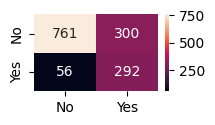

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
# parameters = {"n_estimators": [150,200,250],
#     "min_samples_leaf": np.arange(5, 10),
#     "max_features": np.arange(0.2, 0.7, 0.1),
#     "max_samples": np.arange(0.3, 0.7, 0.1),}

parameters = {"n_estimators": [30,50,100,200],    #50
              "max_depth": [3,5,7],               #5
              "class_weight": [None, {0:0.3, 1:0.7}] }    #

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)
PrintScoreMetrics(rf_estimator_tuned, ShowConfusionMatrix = True,ModelName="RandomForest with GridSearch")
print('Best max_depth:', grid_obj.best_estimator_.get_params()['max_depth'])
print('Best class_weight:', grid_obj.best_estimator_.get_params()['class_weight'])
print('Best n_estimators:', grid_obj.best_estimator_.get_params()['n_estimators'])

Let's test the grid for Accuracy

Training accuracy :  0.8242811501597445
Test accuracy :  0.8126330731014905 

Training recall :  0.5575279421433268
Training recall :  0.5660919540229885 

Best max_depth: 7
Best class_weight: None
Best n_estimators: 100


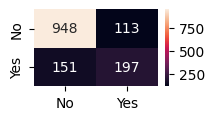

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
# parameters = {"n_estimators": [150,200,250],
#     "min_samples_leaf": np.arange(5, 10),
#     "max_features": np.arange(0.2, 0.7, 0.1),
#     "max_samples": np.arange(0.3, 0.7, 0.1),}

parameters = {"n_estimators": [30,50,100,200],    #50
              "max_depth": [3,5,7],               #5
              "class_weight": [None, {0:0.3, 1:0.7}] }    #

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters ,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)
PrintScoreMetrics(rf_estimator_tuned, ShowConfusionMatrix = True,AddToScoreList=False)
print('Best max_depth:', grid_obj.best_estimator_.get_params()['max_depth'])
print('Best class_weight:', grid_obj.best_estimator_.get_params()['class_weight'])
print('Best n_estimators:', grid_obj.best_estimator_.get_params()['n_estimators'])

Comparing all the results, if recall score is given high value then following are the best parameters:
- Best max_depth: 3
- Best class_weight: {0: 0.3, 1: 0.7}
- Best n_estimators: 100

And, the score would be:
- Accuracy :  **74.73%**
- Recall :  **83.9%**


### E. Train a model using Adaboost and check the performance of the model on train and test data

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=100, random_state=1)
abcl = abcl.fit(X_train, y_train)
PrintScoreMetrics(abcl,ModelName="AdaBoost")

Training accuracy :  0.8093716719914803
Test accuracy :  0.8112136266855926 

Training recall :  0.5522682445759369
Training recall :  0.5747126436781609 



### F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.

Training accuracy :  0.8093716719914803
Test accuracy :  0.8112136266855926 

Training recall :  0.5522682445759369
Training recall :  0.5747126436781609 

Best n_estimators: 100
Best learning_rate: 1


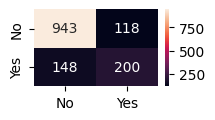

In [ ]:
abc = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {"n_estimators": [30,50,100],
              "learning_rate": [0.1,0.01,1,10],
              }

# Run the grid search
grid_obj = GridSearchCV(abc, parameters ,cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
best_model.fit(X_train, y_train)
PrintScoreMetrics(best_model, ShowConfusionMatrix = True,ModelName="AdaBoost with GridSearch")
print('Best n_estimators:', grid_obj.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:', grid_obj.best_estimator_.get_params()['learning_rate'])

- It seems, 100 estimators and default learning rate are the best parameters.
- The max accuracy is **81.12%**

### G. Train a model using GradientBoost and check the performance of the model on train and test data

Training accuracy :  0.8171813986510472
Test accuracy :  0.815471965933286 

Training recall :  0.5424063116370809
Training recall :  0.5632183908045977 



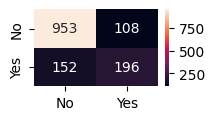

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(X_train, y_train)
PrintScoreMetrics(gbcl, ShowConfusionMatrix = True,ModelName="GradientBoost")

### H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

Training accuracy :  0.8171813986510472
Test accuracy :  0.815471965933286 

Training recall :  0.5424063116370809
Training recall :  0.5632183908045977 

Best n_estimators: 50
Best max_depth: 3


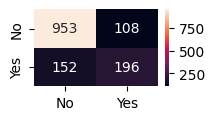

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {"n_estimators": [50,100],
              # "learning_rate": [0.1,0.01,1,10],
              # "ccp_alpha": [0,0.1,0.7],
              # "min_impurity_decrease": [0,0.1,0.7],
              "max_depth": [3,5,7],
              }

# Run the grid search
grid_obj = GridSearchCV(gbc, parameters ,cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
best_model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
best_model.fit(X_train, y_train)
PrintScoreMetrics(best_model, ShowConfusionMatrix = True,ModelName="GradientBoost with GridSearch")
print('Best n_estimators:', grid_obj.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', grid_obj.best_estimator_.get_params()['max_depth'])

- Gradient boosting gives highest accuracy of **81.54%** with 50 estimators

### I. Provide detailed analysis of the below steps

#### (1) Compare the performance of each model in train stage and test stage

In [ ]:
comparison_frame = pd.DataFrame({'Model':model_name,
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall
0,DecisionTree,1.00,0.73,0.99,0.54
1,DecisionTree with GridSearch,0.74,0.75,0.75,0.80
2,RandomForest,0.74,0.75,0.78,0.83
3,RandomForest with GridSearch,0.74,0.75,0.79,0.84
4,AdaBoost,0.81,0.81,0.55,0.57
5,AdaBoost with GridSearch,0.81,0.81,0.55,0.57
6,GradientBoost,0.82,0.82,0.54,0.56
7,GradientBoost with GridSearch,0.82,0.82,0.54,0.56


#### (2) Provide your observation on which model performed the best

- If accuracy is most important, then **Gradient Boosting** gives best accuracy of **82%** with 50 estimators (56.32% recall score)

- In general **RandomForestClassifier** performs well with :

  - Accuracy : 75%
  - Recall : **84%**
- The best parameters are:
  - Best max_depth: 3
  - Best class_weight: {0: 0.3, 1: 0.7}
  - Best n_estimators: 100




#### (3) Provide your reasoning on why the model performed best

- The data is imbalanced (Churn ration is almost 7:3)
- Identifing customers who are churnning is very important.
- So Churn=Yes, this category is given more weight using the class_weight parameter.
This has increased the recall score from 57% to 84%

#### (4) Provide your final conclusion on your observation

- Decision Trees tend to overfit. So prunning is required.
- RandomForest and GradientBoosting models gives good perfomance.
- class_weight is an imortant parameter for such type of data where one category is more important than other categories.